In [1]:
from vega_datasets import data

import acquire as a
import prepare as prep

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Convert date column to datetime format.

In [2]:
df = a.complete_data(cached=True)

In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df.sale_date = pd.to_datetime(df.sale_date).dt.date

In [5]:
df.sale_date

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: sale_date, Length: 913000, dtype: object

### Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='item_price'>

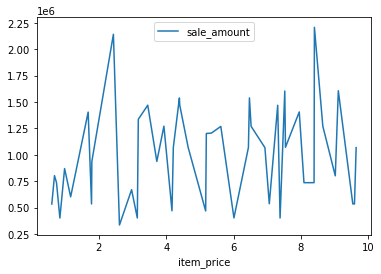

In [5]:
by_date = df.groupby(['item_price']).sale_amount.sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')

### Set the index to be the datetime variable.

In [6]:
df.set_index(df.sale_date, inplace=True)

In [7]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Add a 'month' and 'day of week' column to your dataframe.

In [8]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [9]:
df.month.value_counts()

March        77500
August       77500
October      77500
July         77500
May          77500
January      77500
December     77500
June         75000
November     75000
April        75000
September    75000
February     70500
Name: month, dtype: int64

In [10]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-02 00:00:00+00:00,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday
2013-01-03 00:00:00+00:00,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday
2013-01-04 00:00:00+00:00,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday
2013-01-05 00:00:00+00:00,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['sales_total'] = df.sale_amount * df.item_price

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_id        913000 non-null  int64              
 1   sale_amount    913000 non-null  float64            
 2   sale_date      913000 non-null  datetime64[ns, UTC]
 3   sale_id        913000 non-null  int64              
 4   store_id       913000 non-null  int64              
 5   store_address  913000 non-null  object             
 6   store_city     913000 non-null  object             
 7   store_state    913000 non-null  object             
 8   store_zipcode  913000 non-null  int64              
 9   item_brand     913000 non-null  object             
 10  item_name      913000 non-null  object             
 11  item_price     913000 non-null  float64            
 12  item_upc12     913000 non-null  int64   

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [13]:
germany = pd.read_csv("opsd_germany_daily.csv")

In [14]:
germany.columns = germany.columns.str.lower() 

### Convert date column to datetime format.

In [15]:
germany.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [16]:
germany.date = pd.to_datetime(germany.date)

### Plot the distribution of each of your variables.

<AxesSubplot:>

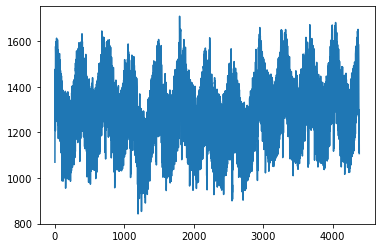

In [17]:
germany.consumption.plot()

<AxesSubplot:>

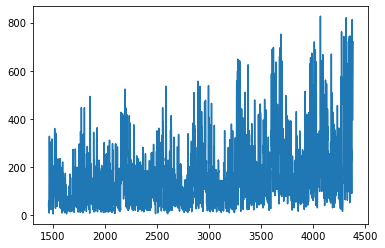

In [18]:
germany.wind.plot()

<AxesSubplot:>

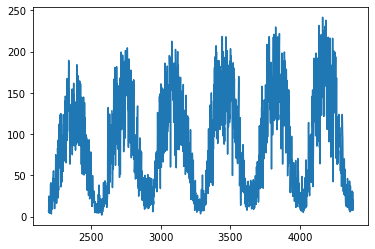

In [19]:
germany.solar.plot()

<AxesSubplot:>

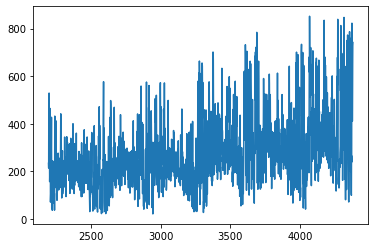

In [20]:
germany['wind+solar'].plot()

### Set the index to be the datetime variable.

In [21]:
germany.set_index(germany.date, inplace=True)

### Add a month and a year column to your dataframe.

In [22]:
germany['month'] = germany.index.month

In [23]:
germany['year'] = germany.index.year

In [24]:
germany.rename(columns={'wind+solar': 'wind_and_solar'}, inplace=True)

### Fill any missing values.

In [25]:
germany.fillna(0, inplace=True)

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.